In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff


In [3]:
url   = 'https://drive.google.com/file/d/1kvjnST4S2j_KOpyPO805RABKe-wF6nLL/view?usp=drive_link'# new heart csv
path  = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
heart =  pd.read_csv(path) # heart.csv

heart={'age':age,
           'sex':sex,
           'cp':cp,
           'trestbps':tres,
           'fbs':fbs,
           'thalach':tha,
           'thal':thal
          }

In [4]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
heart.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

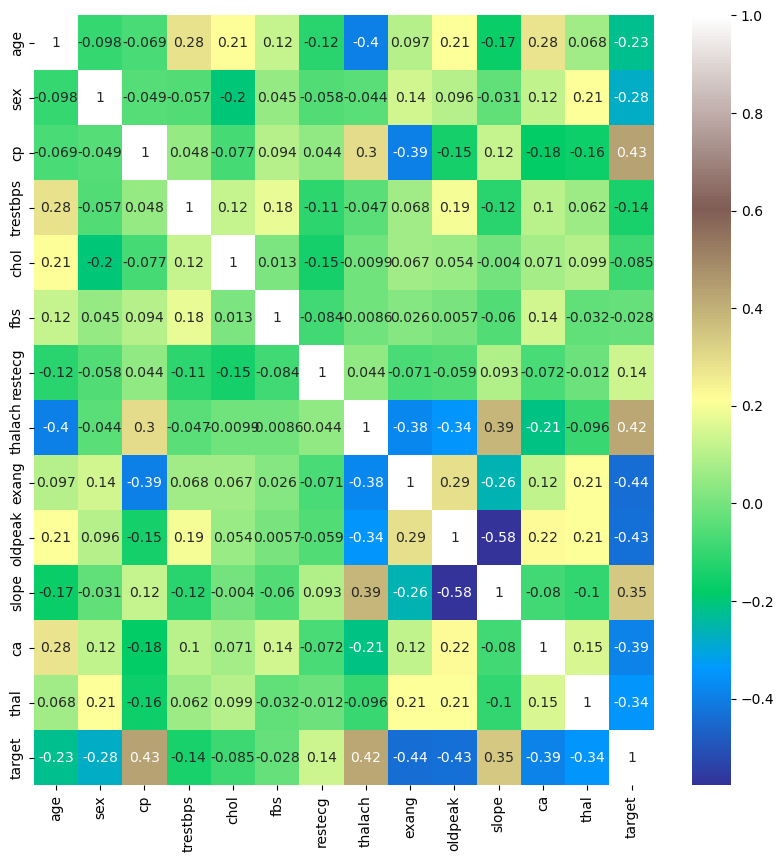

In [6]:
#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(heart.corr(),annot=True,cmap='terrain')

 positive correlation between target and cp, thalach,slope 
 negative correlation between target and sex, exang,ca,thai,oldpeak

heart={'age':age,
           'sex':sex,
           'cp':cp,
           'trestbps':tres,
           'fbs':fbs,
           'thalach':tha,
           'thal':thal
          }

In [7]:
heart = heart.loc[:,['age','sex','cp','trestbps','fbs','thalach','thal','target']] # here i am selecting columns for streamlit app 

In [8]:
#creating dummy variable

#heart = pd.get_dummies(heart,columns= ['sex','cp','trestbps','fbs','thalach','thal'])


In [9]:
heart

,age,sex,cp,trestbps,fbs,thalach,thal,target
0,63,1,3,145,1,150,1,1
1,37,1,2,130,0,187,2,1
2,41,0,1,130,0,172,2,1
3,56,1,1,120,0,178,2,1
4,57,0,0,120,0,163,2,1
...,...,...,...,...,...,...,...,...
298,57,0,0,140,0,123,3,0
299,45,1,3,110,0,132,3,0
300,68,1,0,144,1,141,3,0
301,57,1,0,130,0,115,3,0


In [10]:
print(heart.info()) # the data is clear, no null value,good to go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   fbs       303 non-null    int64
 5   thalach   303 non-null    int64
 6   thal      303 non-null    int64
 7   target    303 non-null    int64
dtypes: int64(8)
memory usage: 19.1 KB
None


In [11]:
heart.isnull().sum() # totally clear data

age         0
sex         0
cp          0
trestbps    0
fbs         0
thalach     0
thal        0
target      0
dtype: int64

Importing Libraries

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [13]:
#Splitting the data
y= heart['target']
X= heart.drop('target',axis=1)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [15]:
#accuracy_list = []

In [16]:
#LogisticRegression Classifier

#log_reg = LogisticRegression()
#log_reg.fit(X_train,y_train)
#log_reg_pred = log_reg.predict(X_test)
#log_reg_acc = accuracy_score(y_test,log_reg_pred)  # here i am not only getting the accuracy of y_test but also X_test
#accuracy_list.append(100*log_reg_acc)

In [17]:
#from colorama import Fore, Style

#print(Fore.GREEN + 'Accuracy of Logistic Regression :','{:.2f}%'.format(100*log_reg_acc))

In [18]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'fbs', 'thalach', 'thal'], dtype='object')

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 170 to 98
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       212 non-null    int64
 1   sex       212 non-null    int64
 2   cp        212 non-null    int64
 3   trestbps  212 non-null    int64
 4   fbs       212 non-null    int64
 5   thalach   212 non-null    int64
 6   thal      212 non-null    int64
dtypes: int64(7)
memory usage: 13.2 KB


cp = chest pain
fbs = fasting blood suger level
trestbps = 

In [20]:
LR_classifier = LogisticRegression(random_state = 123)
clf = svm.SVC()
sgd = SGDClassifier()
forest = RandomForestClassifier(n_estimators=20,random_state =123,max_depth=6)
tree = DecisionTreeClassifier(criterion='entropy',random_state=123,max_depth = 6)

LR_classifier.fit(X_train,y_train)
clf.fit(X_train,y_train)
sgd.fit(X_train,y_train)
tree.fit(X_train,y_train)
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=20, random_state=123)

In [21]:
#accuracy_score =[] # to append the result of every model

In [22]:
print(forest)

RandomForestClassifier(max_depth=6, n_estimators=20, random_state=123)


In [23]:
#training accuracy

y_pred = LR_classifier.predict(X_train)
y_predsvm = clf.predict(X_train)
y_predsgd = sgd.predict(X_train)
y_predtree = tree.predict(X_train)
y_predforest = forest.predict(X_train)

In [24]:
print(accuracy_score(y_train, y_pred))
print(accuracy_score(y_train, y_predsvm))
print(accuracy_score(y_train, y_predsgd))
print(accuracy_score(y_train, y_predtree))
print(accuracy_score(y_train, y_predforest))

0.8066037735849056
0.660377358490566
0.6462264150943396
0.9009433962264151
0.9245283018867925


In [25]:
y_train

170    0
132    1
136    1
286    0
166    0
      ..
106    1
83     1
17     1
230    0
98     1
Name: target, Length: 212, dtype: int64

In [26]:
y_pred


array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [27]:
#graphical presentation of all models
#model_list = ['Logistic Regression','SVM','SGD','DecisionTree', 'RandomForest']

In [28]:
import pickle
pickle.dump(forest,open('Random_forest_Classifier.pickle','wb'))

#pickle.dump(tree,open(r'C:\Users\atharv\Desktop\data_science\Final_project\Decision_tree_Classifier.pickle','wb'))

In [29]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'fbs', 'thalach', 'thal'], dtype='object')

iteration 1 

###############################   Data Visualization  ####################################

In [30]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [31]:
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go

<Axes: >

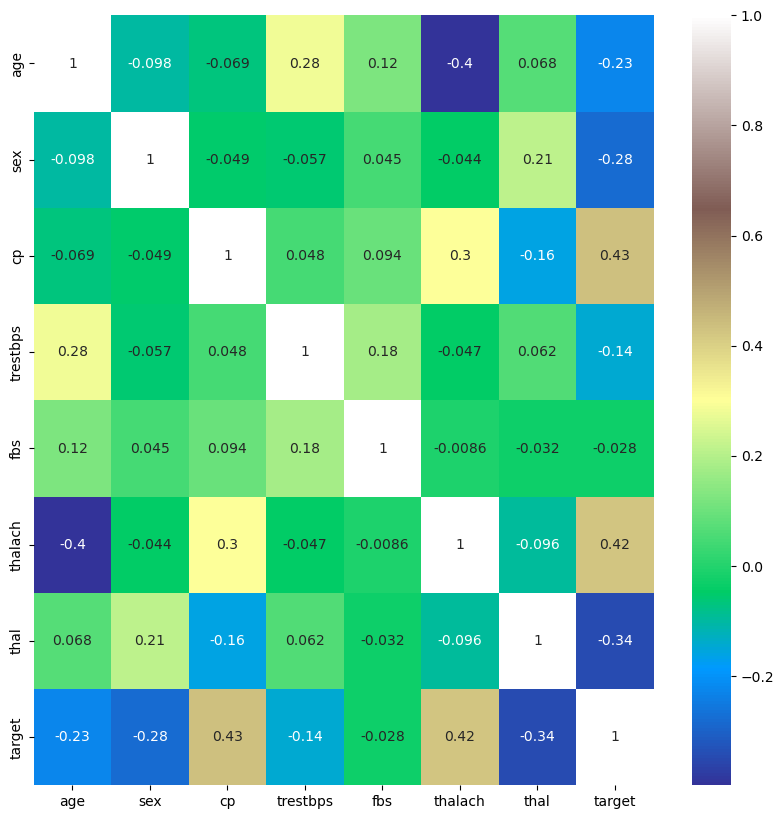

In [32]:
#Heatmap after selecting features

plt.figure(figsize=(10,10))
sns.heatmap(heart.corr(),annot=True,cmap='terrain')

 positive correlation between target and cp, thalach, 
 negative correlation between target and sex,ca,thal,

In [33]:
#Value counts of features

heart['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [34]:
heart['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [35]:
heart['fbs'].value_counts() # fasting blood sugar level

0    258
1     45
Name: fbs, dtype: int64

In [36]:
heart['trestbps'].value_counts() # resting blood pressure

120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trestbps, dtype: int64

Number of people having sex as 0 are96 and Number of people having sex as 1 are 207


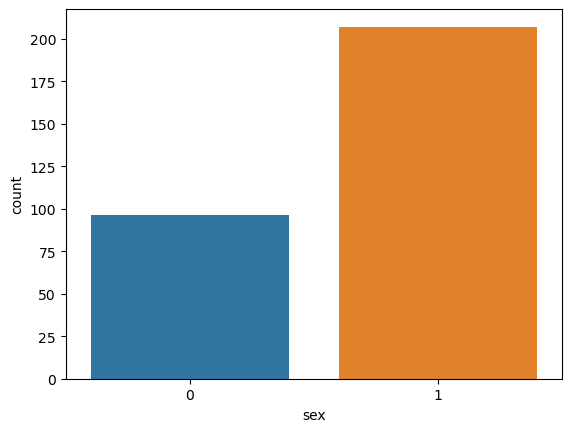

In [37]:
# counting number of female and male from dataset
x = (heart.sex.value_counts())
print(f'Number of people having sex as 0 are{x[0]} and Number of people having sex as 1 are {x[1]}')
p = sns.countplot(data=heart,x='sex')
plt.show()

it is clear from above map that,in total count female count is less than male count.Male = 207 and Female = 96

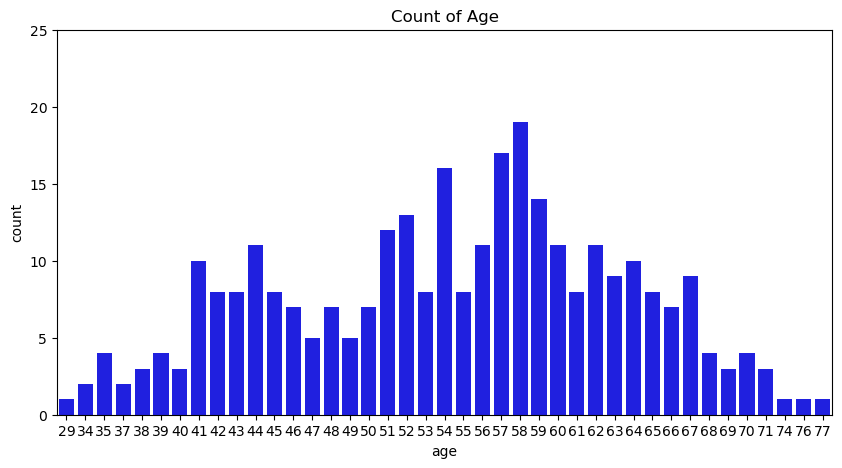

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x='age',data=heart,color='b');
plt.ylim(0,25)
plt.title("Count of Age");

The majority of the people in the dataset are between the ages of 54 and 60.

In [39]:
heart_attack = heart[heart['target']==1] # here i will get the people who have the heart attack
heart_attack

,age,sex,cp,trestbps,fbs,thalach,thal,target
0,63,1,3,145,1,150,1,1
1,37,1,2,130,0,187,2,1
2,41,0,1,130,0,172,2,1
3,56,1,1,120,0,178,2,1
4,57,0,0,120,0,163,2,1
...,...,...,...,...,...,...,...,...
160,56,1,1,120,0,169,2,1
161,55,0,1,132,0,166,2,1
162,41,1,1,120,0,182,2,1
163,38,1,2,138,0,173,2,1


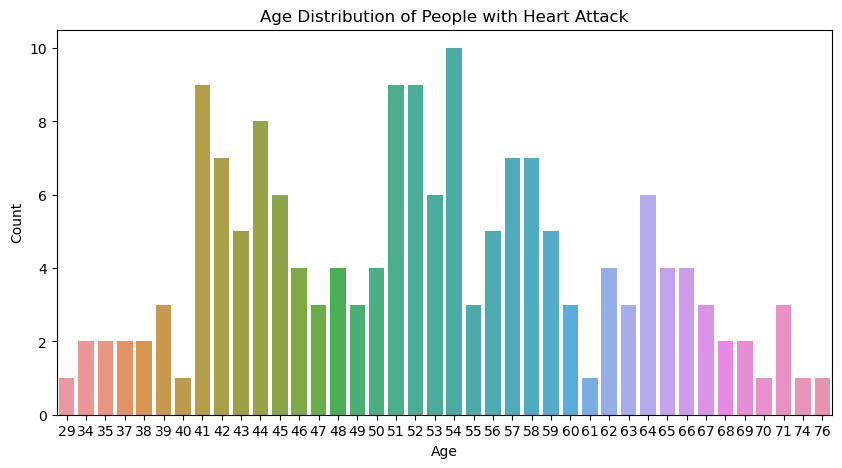

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x="age", data=heart_attack)
plt.title('Age Distribution of People with Heart Attack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

By examining this graph, you can quickly identify the age ranges where the incidence of heart attacks is more prevalent.

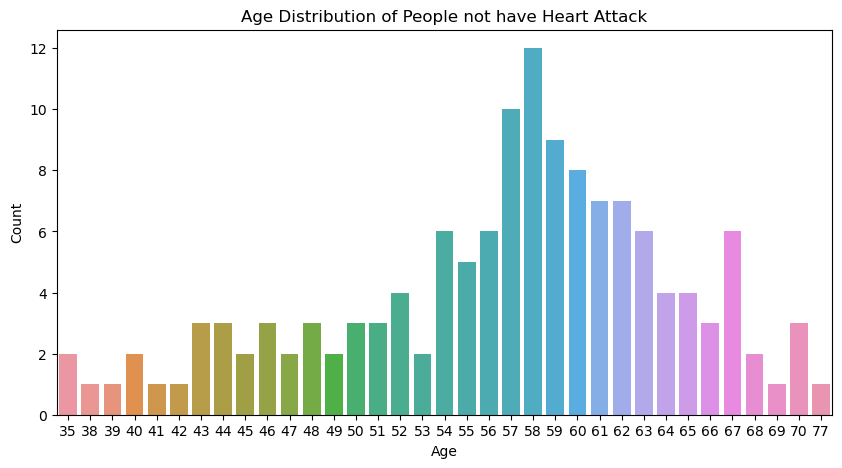

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x="age", data=heart[heart['target']==0])
plt.title('Age Distribution of People not have Heart Attack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

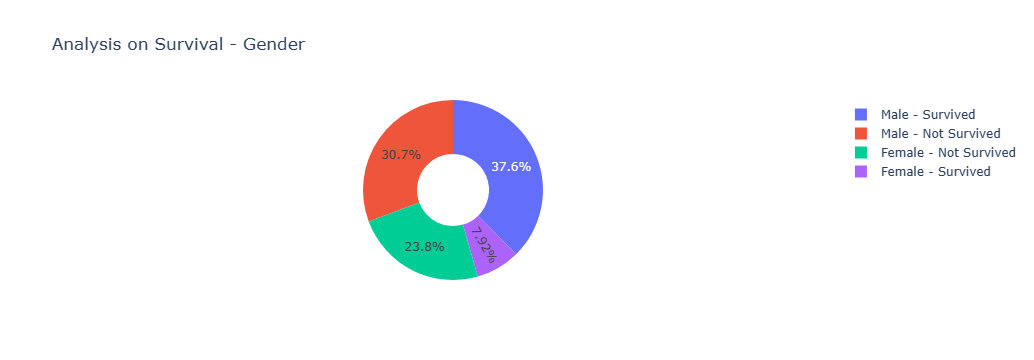

In [42]:
male = heart[heart['sex']==1]
female = heart[heart['sex']==0]

male_survived = heart[heart['target']==0]
male_not_survived = heart[heart['target']==1]

female_survived = heart[heart['target']==0]
female_not_survived = heart[heart['target']==1]

labels = ['Male - Survived','Male - Not Survived','Female - Survived','Female - Not Survived']
values = [len (male[heart['target']==0]),len(male[heart['target']==1]),
         len(female[heart['target']==0]),len(female[heart['target']==1])]

figure = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.4)])
figure.update_layout(title_text='Analysis on Survival - Gender')
figure.show()

Number of people having sex as 0 are96 and Number of people having sex as 1 are 207


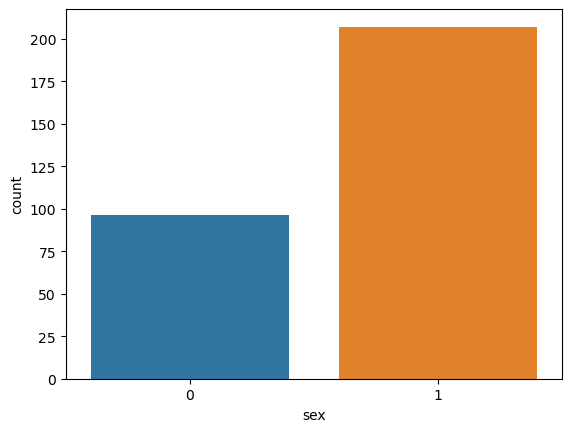

In [43]:
# counting number of female and male from dataset
x = (heart.sex.value_counts())
print(f'Number of people having sex as 0 are{x[0]} and Number of people having sex as 1 are {x[1]}')
p = sns.countplot(data=heart,x='sex')
plt.show()

In [44]:
x=(heart)

In [45]:
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Total number of Heart diseases cases are 165
Other cases or No Heart disease cases are 138

<Axes: xlabel='sex', ylabel='count'>

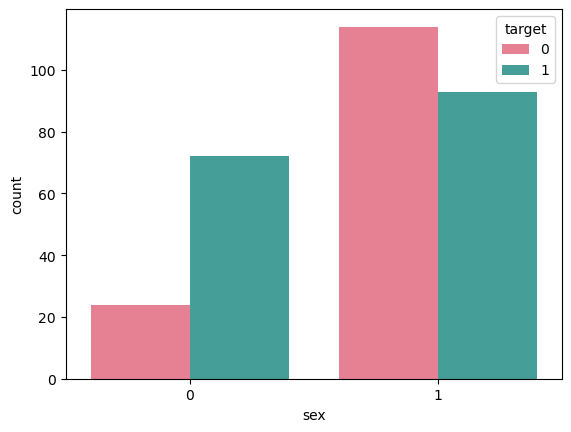

In [46]:
#heart diseases count in female and male
sns.countplot(x='sex', data=heart, palette='husl', hue='target')

here in above bar chart 0 = Female
                        1 = Male 
                        Blue = number of people died so in above chart count of Male looks high
                        pink = number of people not died so in above chart female count is low.
 Conclusion: Male count is higher than female count                       

In [47]:
#init_notebook_mode(connected=True)
#warnings.filterwarnings("ignore")
#import plotly.figure_factory as ff

Diabetes

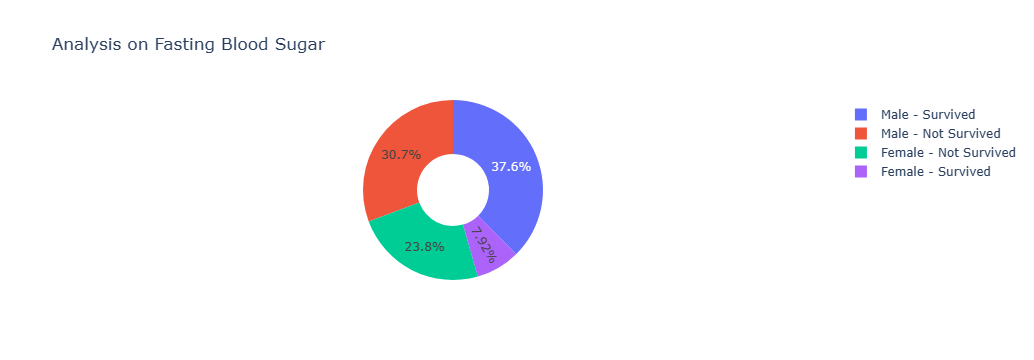

In [48]:
labels = ['No Fbs','Fbs']
fbs_yes = heart[heart['fbs']==1]
fbs_no = heart[heart['fbs']==0]

values = [len(fbs_no),len(fbs_yes)]

figure.update_layout(title_text='Analysis on Fasting Blood Sugar')
figure.show()

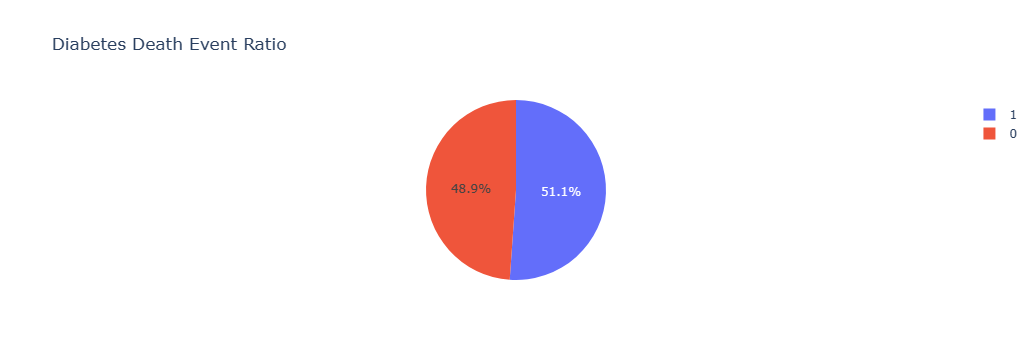

In [49]:
import plotly.express as px
fig = px.pie(heart,values ='fbs',names='target',title='Diabetes Death Event Ratio')
fig.show()

High blood pressure

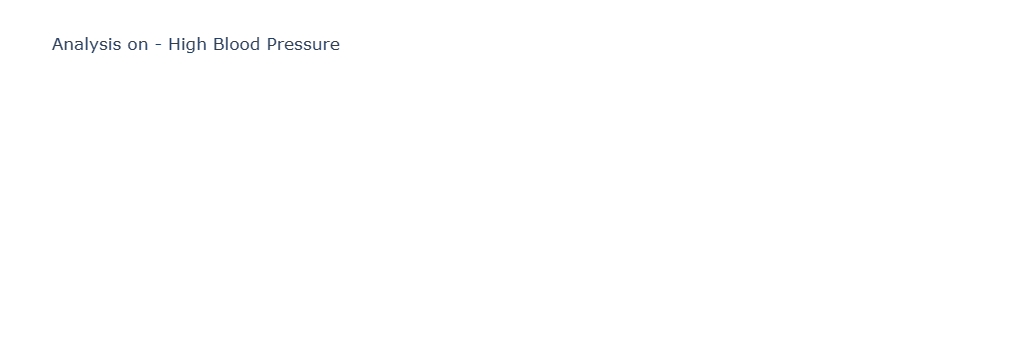

In [50]:
labels = ["Low trestbps","High trestbps"]

trestbps_high = heart[heart['trestbps']==1]
trestbps_low = heart[heart['trestbps']==0]

values = [len(trestbps_low), len(trestbps_high)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - High Blood Pressure")
fig.show()


#labels = ['No Fbs','Fbs']
#fbs_yes = heart[heart['fbs']==1]
#fbs_no = heart[heart['fbs']==0]

#values = [len(fbs_no),len(fbs_yes)]

#figure.update_layout(title_text='Analysis on Fasting Blood Sugar')
#figure.show()

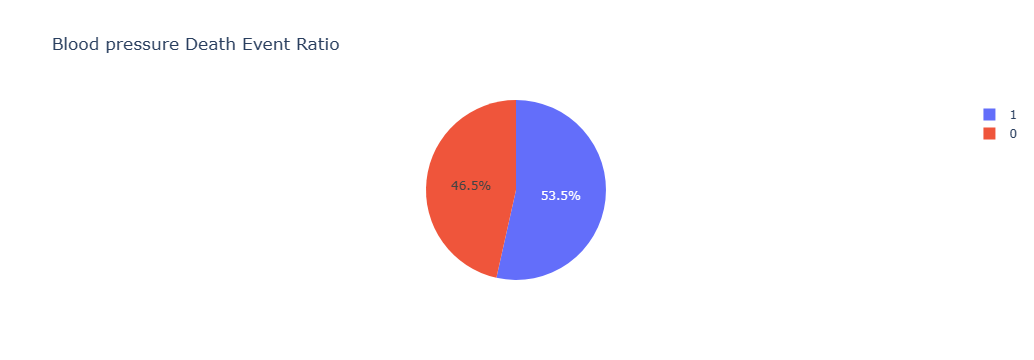

In [51]:
import plotly.express as px
fig = px.pie(heart,values ='trestbps',names='target',title='Blood pressure Death Event Ratio')
fig.show()

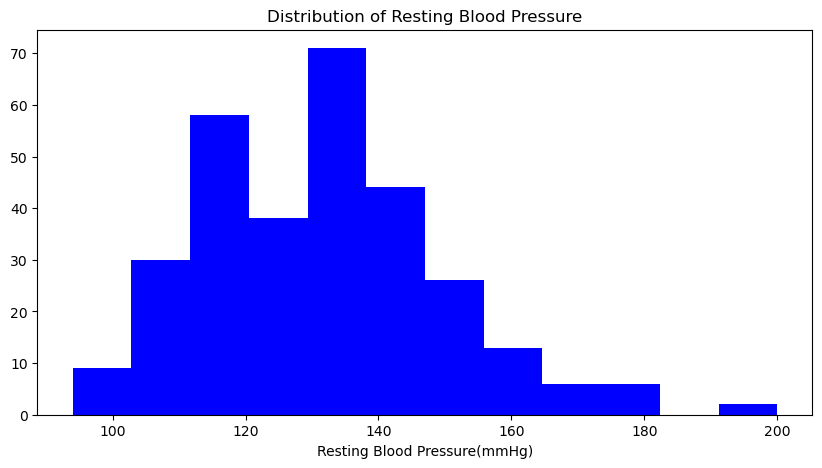

In [52]:
plt.figure(figsize=(10,5))
plt.hist(heart['trestbps'],bins=12,color='blue');
plt.title("Distribution of Resting Blood Pressure");
plt.xlabel("Resting Blood Pressure(mmHg)");
plt.show();

mmHg is millimeters of mercury.
The average resting blood pressure for adults is about 120/80 mmHg.
According to the graph above, approximately 60% of the population has excessive blood pressure.

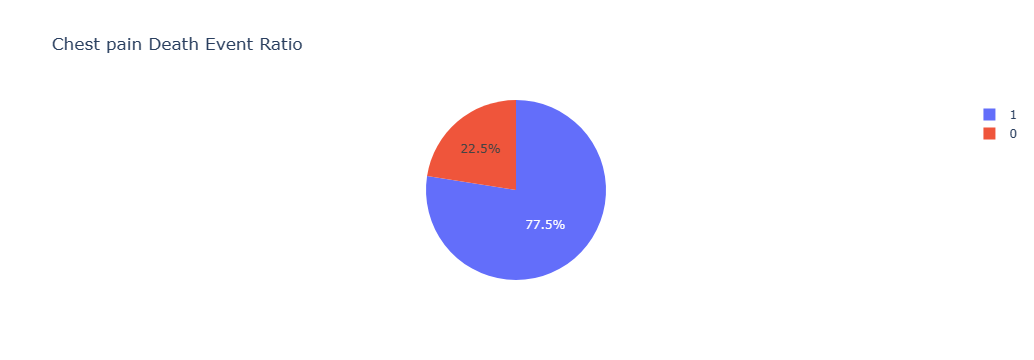

In [53]:
import plotly.express as px
fig = px.pie(heart,values ='cp',names='target',title='Chest pain Death Event Ratio')
fig.show()

In [54]:
colors = ['aqua', 'gold', 'lightcoral', 'dodgerblue']

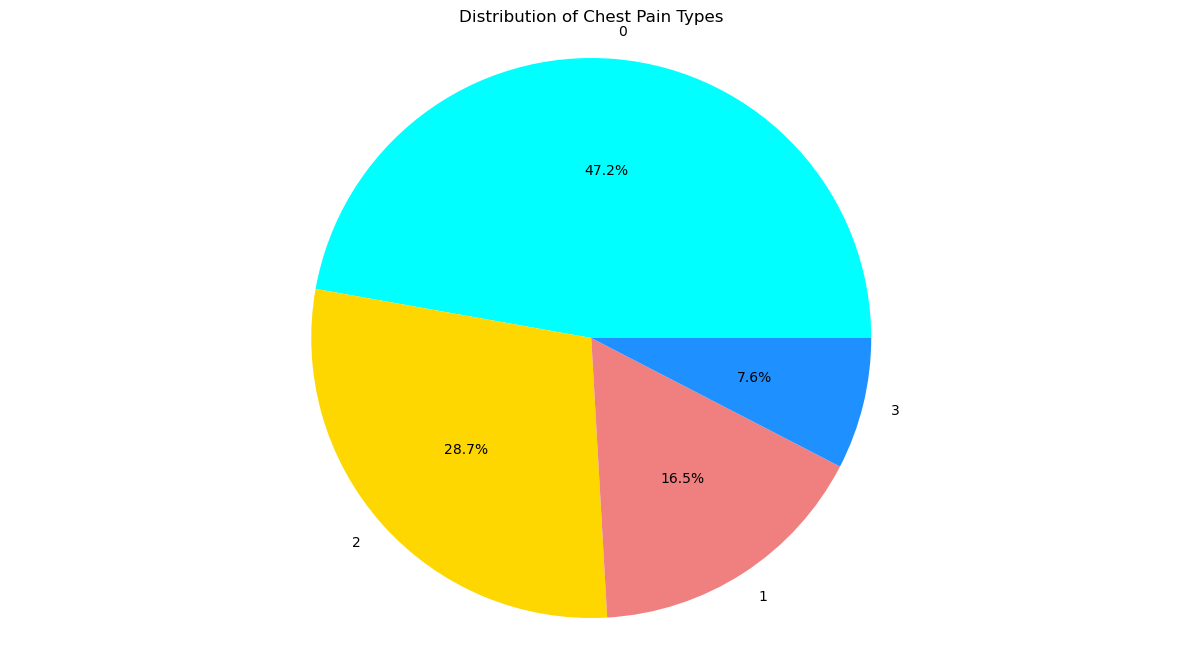

In [55]:
cp_counts = heart.cp.value_counts()

plt.figure(figsize=(15,8))    ####   new change
plt.pie(cp_counts,labels=cp_counts.index,autopct='%1.1f%%',colors=colors);#colors=colors
plt.title("Distribution of Chest Pain Types");
plt.axis('equal');
plt.show()

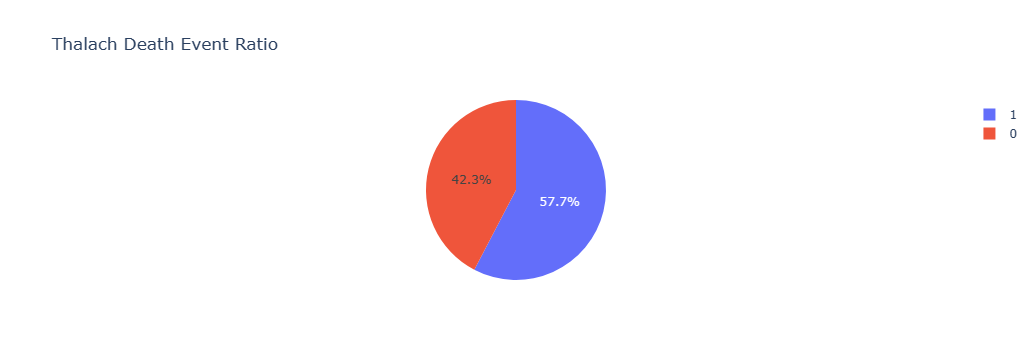

In [56]:
import plotly.express as px
fig = px.pie(heart,values ='thalach',names='target',title='Thalach Death Event Ratio')
fig.show()

#thalach: The person's maximum heart rate achieved.

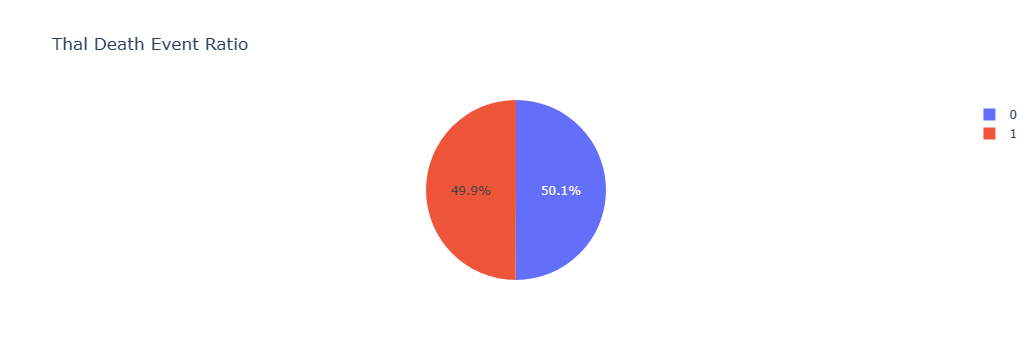

In [57]:
import plotly.express as px
fig = px.pie(heart,values ='thal',names='target',title='Thal Death Event Ratio')
fig.show()

#thal: A blood disorder 

<Axes: xlabel='thal', ylabel='count'>

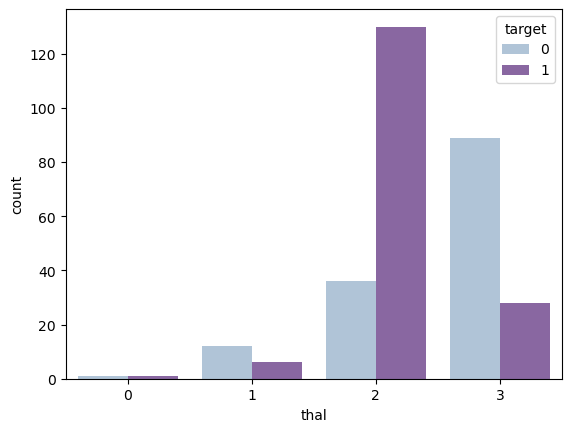

In [58]:
#count plot for thal
sns.countplot(x='thal',data=heart, hue='target', palette='BuPu' )

<Axes: xlabel='sex', ylabel='target'>

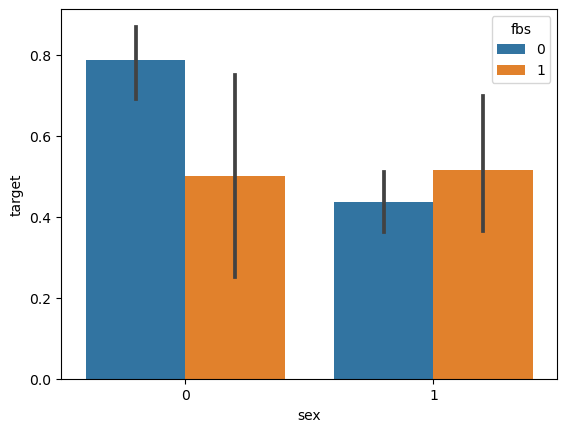

In [59]:
sns.barplot(x='sex',y='target', hue='fbs',data=heart)